In [52]:
import json
from collections import Counter, defaultdict

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [53]:
# compare slicing by index delta (~10% contributions) and subthread (~2% contributions)
# is there enough context?


In [54]:
with open('../data/interim/labeling_discussion_subset/discussions_by_subthread.jsonl') as f:
    thread_lens = [len(v) for l in f for k, v in json.loads(l).items()]

Text(0.5, 1.0, 'subthread')

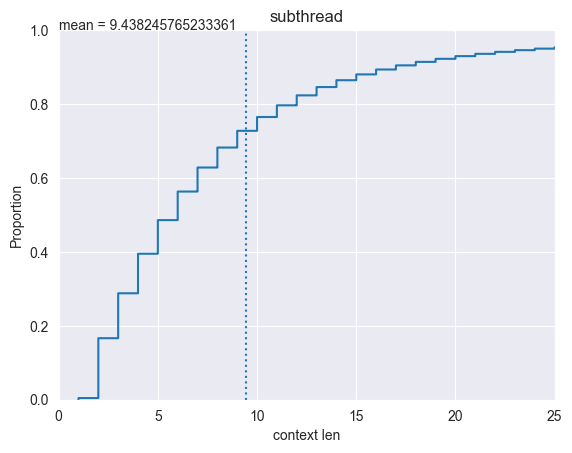

In [55]:
df = pd.DataFrame(thread_lens)
df.columns=['context len']
ax = sns.ecdfplot(df, x='context len')
ax.set_xlim(0, 25)
context_mean = df['context len'].mean()
ax.axvline(context_mean, ls=':')
plt.annotate(f"mean = {context_mean}", xy=(0, 1))
ax.set_title('subthread')

In [56]:
threads = defaultdict(set)
with open('../data/interim/labeling_discussion_subset/discussions_by_subthread.jsonl') as f:
    for l in f:
        for k, vv in json.loads(l).items():
            threads[k].update({v['fullname'] for v in vv})


Text(0.5, 1.0, 'subthread')

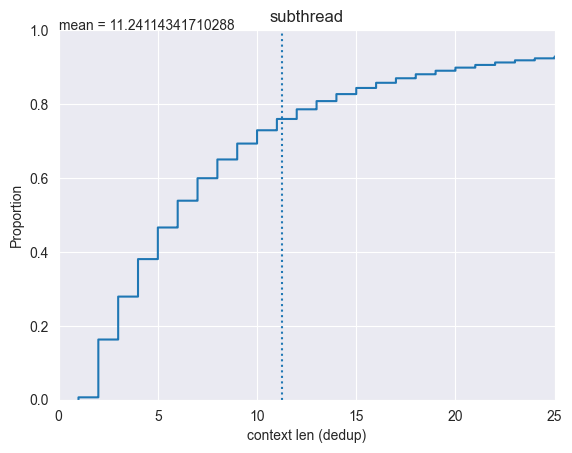

In [57]:
df_unique = pd.DataFrame(len(v) for k, v in  threads.items())
df_unique.columns=['context len (dedup)']
ax = sns.ecdfplot(df_unique, x='context len (dedup)')
ax.set_xlim(0, 25)
context_mean = df_unique['context len (dedup)'].mean()
ax.axvline(context_mean, ls=':')
plt.annotate(f"mean = {context_mean}", xy=(0, 1))
ax.set_title('subthread')

In [58]:
with open('../data/interim/labeling_discussion_subset/discussions_by_subthread.jsonl') as f:
    subreddits = Counter(v.get('subreddit', None) for item in map(json.loads, f) for _, vv in item.items() for v in vv)

In [59]:
subreddits.most_common(10)

[('conspiracy', 1019911),
 ('politics', 691235),
 ('worldnews', 437448),
 ('AskReddit', 377754),
 ('news', 304693),
 ('todayilearned', 119507),
 ('pics', 99928),
 ('technology', 88946),
 ('videos', 85369),
 ('SubredditDrama', 79873)]

Text(0.5, 1.0, 'subthread')

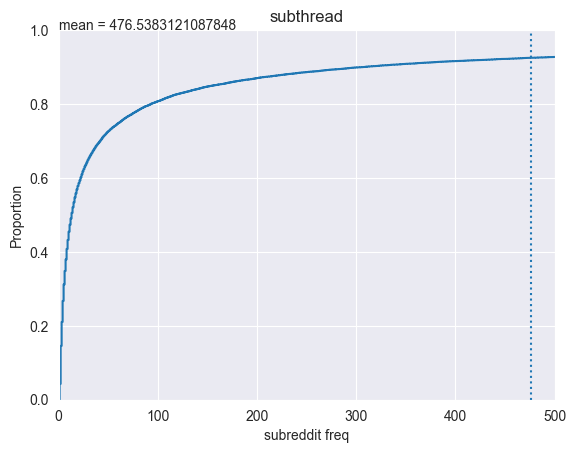

In [60]:
df_subreddits = pd.DataFrame(subreddits.values())
df_subreddits.columns=['subreddit freq']
ax = sns.ecdfplot(df_subreddits, x='subreddit freq')
ax.set_xlim(0, 500)
context_mean = df_subreddits['subreddit freq'].mean()
ax.axvline(context_mean, ls=':')
plt.annotate(f"mean = {context_mean}", xy=(0, 1))
ax.set_title('subthread')

In [61]:
print('total contributions in filtered discussion')
df.sum()

total contributions in filtered discussion


context len    11039010
dtype: int64

In [62]:
print('unique contributions in filtered discussion')
df_unique.sum()

unique contributions in filtered discussion


context len (dedup)    9062385
dtype: int64

In [63]:
with open('../data/interim/labeling_discussion_subset/discussions_by_index_delta.jsonl') as f:
    thread_lens = [len(v) for l in f for k, v in json.loads(l).items()]

Text(0.5, 1.0, 'index delta')

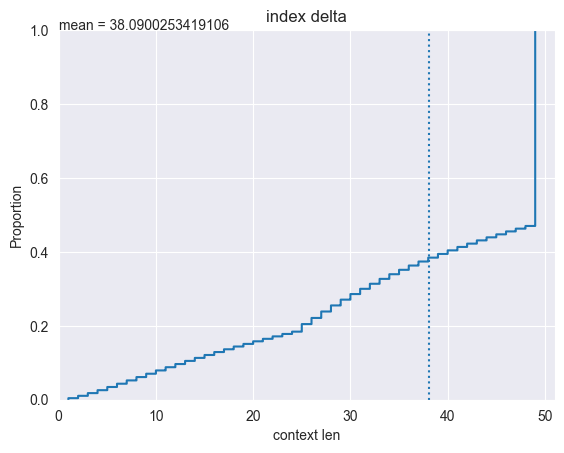

In [75]:
df = pd.DataFrame(thread_lens)
df.columns=['context len']
ax = sns.ecdfplot(df, x='context len')
ax.set_xlim(0, 51)
context_mean = df['context len'].mean()
ax.axvline(context_mean, ls=':')
plt.annotate(f"mean = {context_mean}", xy=(0, 1))
ax.set_title('index delta')

In [65]:
threads = defaultdict(set)
with open('../data/interim/labeling_discussion_subset/discussions_by_index_delta.jsonl') as f:
    for l in f:
        for k, vv in json.loads(l).items():
            threads[k].update({v['fullname'] for v in vv})


Text(0.5, 1.0, 'index delta')

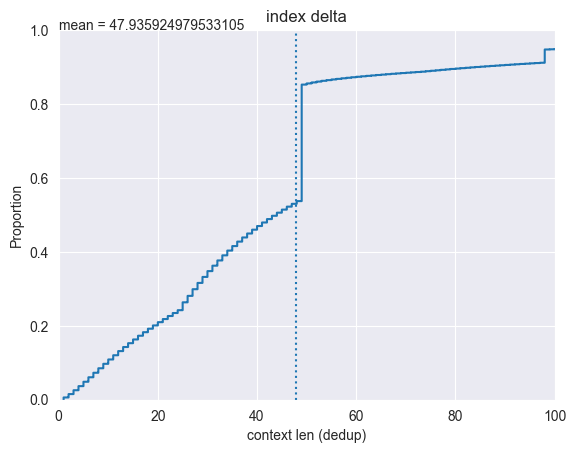

In [73]:
df_unique = pd.DataFrame(len(v) for k, v in  threads.items())
df_unique.columns=['context len (dedup)']
ax = sns.ecdfplot(df_unique, x='context len (dedup)')
ax.set_xlim(0, 100)
context_mean = df_unique['context len (dedup)'].mean()
ax.axvline(context_mean, ls=':')
plt.annotate(f"mean = {context_mean}", xy=(0, 1))
ax.set_title('index delta')

In [67]:
with open('../data/interim/labeling_discussion_subset/discussions_by_index_delta.jsonl') as f:
    subreddits = Counter(v.get('subreddit', None) for item in map(json.loads, f) for _, vv in item.items() for v in vv)

In [68]:
subreddits.most_common(10)

[('conspiracy', 3660327),
 ('politics', 3236033),
 ('AskReddit', 2056544),
 ('worldnews', 1818655),
 ('news', 1298635),
 ('todayilearned', 507563),
 ('The_Donald', 432097),
 ('pics', 422296),
 ('technology', 382004),
 ('videos', 378080)]

Text(0.5, 1.0, 'index delta')

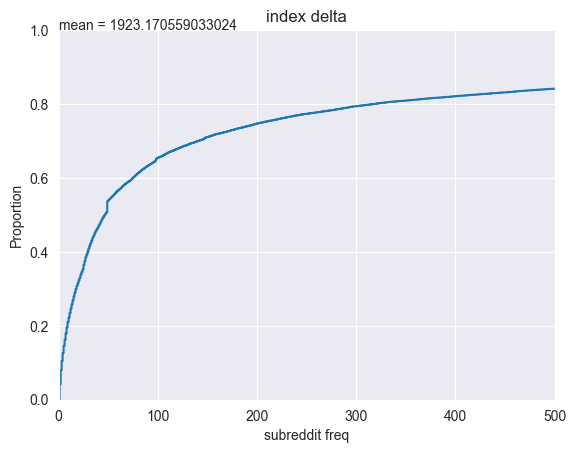

In [69]:
df_subreddits = pd.DataFrame(subreddits.values())
df_subreddits.columns=['subreddit freq']
ax = sns.ecdfplot(df_subreddits, x='subreddit freq')
ax.set_xlim(0, 500)
context_mean = df_subreddits['subreddit freq'].mean()
ax.axvline(context_mean, ls=':')
plt.annotate(f"mean = {context_mean}", xy=(0, 1))
ax.set_title('index delta')

In [70]:
print('total contributions in filtered discussion')
df.sum()

total contributions in filtered discussion


context len    44550246
dtype: int64

In [71]:
print('unique contributions in filtered discussion')
df_unique.sum()

unique contributions in filtered discussion


context len (dedup)    38644984
dtype: int64